Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [57]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [58]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [60]:
from numpy import linalg
w1 = np.dot(fi.transpose(), fi)
w2 = np.linalg.inv(w1)
w3 = np.dot(w2, fi.transpose())
w4 = np.dot(w3, y)
w5 = np.linalg.pinv(fi)
w6 = np.dot(w5, y)
print(w4)
print(w6)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143

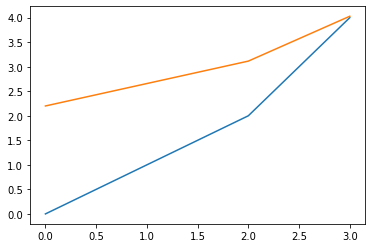

In [61]:
from sklearn.metrics import mean_squared_error
def f(a): return np.dot(w6.transpose(), a)
draw = []
for i in fi:
    draw.append(f(i))
plt.plot(X)
plt.plot(draw)
mean_squared_error(y, draw)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [62]:
#w = np.dot(np.linalg.inv(fi), y)
np.linalg.inv(fi)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
reg.predict(X)

[0.45714286]
2.2


array([2.2       , 2.65714286, 3.11428571, 4.02857143])

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [64]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return np.array([np.array(f(x) + normal(0, noise)) for x in X])

In [65]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [66]:
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

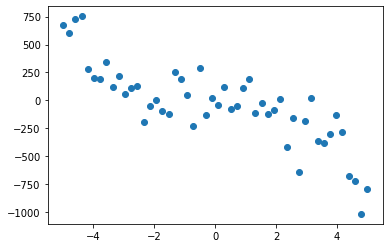

In [67]:
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

26020.795184134706

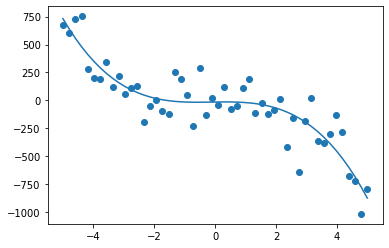

In [68]:
poly = PolynomialFeatures(3)
fi = poly.fit_transform(X)
reg = LinearRegression().fit(fi, y)
pred = reg.predict(fi)
plt.plot(X, pred)
plt.scatter(X, y)
mean_squared_error(y, pred)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

[43713.04704692504, 26020.795184134706, 25430.222679526916, 20505.105446048103, 16401.33340089936]


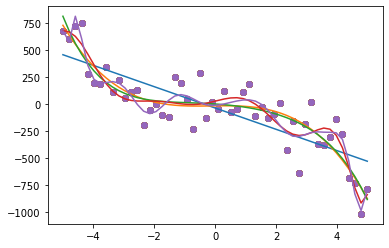

In [69]:
errors = []
for i in [1, 3, 5, 10, 20]:
    poly = PolynomialFeatures(i)
    fi = poly.fit_transform(X)
    reg = LinearRegression().fit(fi, y)
    pred = reg.predict(fi)
    plt.plot(X, pred)
    plt.scatter(X, y)
    errors.append(mean_squared_error(y, pred))
print(errors)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

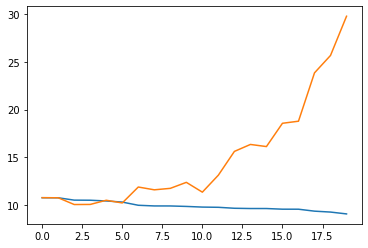

In [70]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.5)
errorsTrain = []
errorsTest = []
for i in range(1, 21):
    poly = PolynomialFeatures(i)
    fi = poly.fit_transform(Xtrain)
    reg = LinearRegression().fit(fi, Ytrain)
    pred = reg.predict(fi)
    errorsTrain.append(np.log(mean_squared_error(Ytrain, pred)))
    fi = poly.fit_transform(Xtest)
    pred = reg.predict(fi)
    errorsTest.append(np.log(mean_squared_error(Ytest, pred)))
plt.plot(errorsTrain)
plt.plot(errorsTest)

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

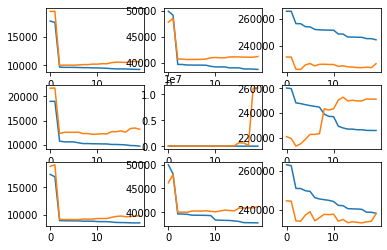

In [51]:
X = make_instances(-5, 5, 1000)
Xtrain, Xtest = train_test_split(X, test_size = 0.5)
y11 = make_labels(Xtrain, f, 100)
y21 = make_labels(Xtrain, f, 200)
y31 = make_labels(Xtrain, f, 500)
y12 = make_labels(Xtest, f, 100)
y22 = make_labels(Xtest, f, 200)
y32 = make_labels(Xtest, f, 500)
dataFullTrain = []
dataTwoThirdsTrain = []
dataOneThirdTrain = []
dataFullTest = []
dataTwoThirdsTest = []
dataOneThirdTest = []
for i in [y11, y21, y31]:
    dataFullTrain.append([Xtrain, i])
    X, a, y, b = train_test_split(Xtrain, i, test_size = 2/3)
    dataTwoThirdsTrain.append([X, y])
    X, a, y, b = train_test_split(Xtrain, i, test_size = 1/3)
    dataOneThirdTrain.append([X, y])
for i in [y12, y22, y32]:
    dataFullTest.append([Xtest, i])
    X, a, y, b = train_test_split(Xtest, i, test_size = 2/3)
    dataTwoThirdsTest.append([X, y])
    X, a, y, b = train_test_split(Xtest, i, test_size = 1/3)
    dataOneThirdTest.append([X, y])
draw = []
for j in zip(dataFullTrain, dataFullTest):
    errorsTrain = []
    errorsTest = []
    for i in range(1, 21):
        poly = PolynomialFeatures(i)
        fi = poly.fit_transform(j[0][0])
        reg = LinearRegression().fit(fi, j[0][1])
        pred = reg.predict(fi)
        errorsTrain.append(mean_squared_error(j[0][1], pred))
        fi = poly.fit_transform(j[1][0])
        pred = reg.predict(fi)
        errorsTest.append(mean_squared_error(j[1][1], pred))
    draw.append([errorsTrain, errorsTest])
for j in zip(dataTwoThirdsTrain, dataTwoThirdsTest):
    errorsTrain = []
    errorsTest = []
    for i in range(1, 21):
        poly = PolynomialFeatures(i)
        fi = poly.fit_transform(j[0][0])
        reg = LinearRegression().fit(fi, j[0][1])
        pred = reg.predict(fi)
        errorsTrain.append(mean_squared_error(j[0][1], pred))
        fi = poly.fit_transform(j[1][0])
        pred = reg.predict(fi)
        errorsTest.append(mean_squared_error(j[1][1], pred))
    draw.append([errorsTrain, errorsTest])
for j in zip(dataOneThirdTrain, dataOneThirdTest):
    errorsTrain = []
    errorsTest = []
    for i in range(1, 21):
        poly = PolynomialFeatures(i)
        fi = poly.fit_transform(j[0][0])
        reg = LinearRegression().fit(fi, j[0][1])
        pred = reg.predict(fi)
        errorsTrain.append(mean_squared_error(j[0][1], pred))
        fi = poly.fit_transform(j[1][0])
        pred = reg.predict(fi)
        errorsTest.append(mean_squared_error(j[1][1], pred))
    draw.append([errorsTrain, errorsTest])
f, xy = plt.subplots(3, 3)
index = 0
for i in range(3):
    for j in range(3):
        xy[i, j].plot(draw[index][0])
        xy[i, j].plot(draw[index][1])
        index += 1

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [71]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
fi = poly.fit_transform(X)
for i in [0, 1, 10]:
    w1 = np.dot(fi.transpose(), fi)
    lamb = i*np.identity(4)
    w2lamb = w1 + lamb
    w2 = np.linalg.inv(w2lamb)
    w3 = np.dot(w2, fi.transpose())
    w4 = np.dot(w3, y)
    print(w4)
for i in [0, 1, 10]:
    w1 = np.dot(fi.transpose(), fi)
    lamb = i*np.identity(4)
    lamb[0][0] = 0
    w2lamb = w1 + lamb
    w2 = np.linalg.inv(w2lamb)
    w3 = np.dot(w2, fi.transpose())
    w4 = np.dot(w3, y)
    print(w4)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]
[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [72]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0)
clf.fit(fi, y)
print(clf.coef_)
print(clf.intercept_)
clf = Ridge(alpha=1)
clf.fit(fi, y)
print(clf.coef_)
print(clf.intercept_)
clf = Ridge(alpha=10)
clf.fit(fi, y)
print(clf.coef_)
print(clf.intercept_)

[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000032
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

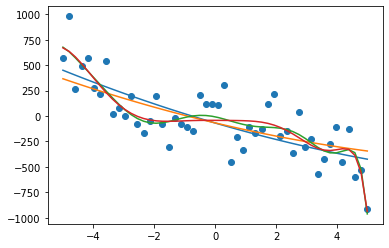

In [73]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
for i in [2, 10]:    
    poly = PolynomialFeatures(i)
    fi = poly.fit_transform(X)
    clf = Ridge(alpha=0)
    clf.fit(fi, y)
    pred = clf.predict(fi)
    plt.plot(X, pred)
    poly = PolynomialFeatures(i)
    fi = poly.fit_transform(X)
    clf = Ridge(alpha=100)
    clf.fit(fi, y)
    pred = clf.predict(fi)
    plt.plot(X, pred)
plt.scatter(X, y)

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


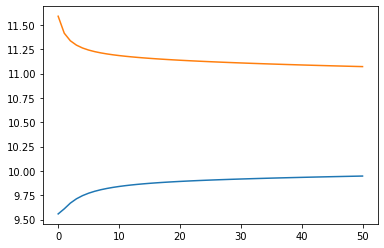

In [78]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.5)
errorsTrain = []
errorsTest = []
for i in range(51):
    poly = PolynomialFeatures(10)
    fi = poly.fit_transform(Xtrain)
    clf = Ridge(alpha=i)
    clf.fit(fi, Ytrain)
    pred = clf.predict(fi)
    errorsTrain.append(np.log(mean_squared_error(Ytrain, pred)))
    fi = poly.fit_transform(Xtest)
    pred = clf.predict(fi)
    errorsTest.append(np.log(mean_squared_error(Ytest, pred)))

plt.plot(errorsTrain)
plt.plot(errorsTest)

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [79]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

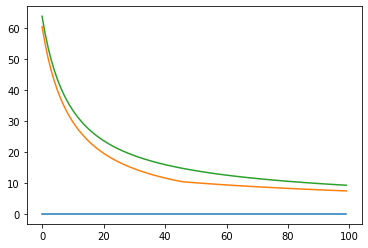

In [80]:
from sklearn.linear_model import Ridge
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.5)
L0norm = []
L1norm = []
L2norm = []
errorsTest = []
for i in range(1, 101):
    poly = PolynomialFeatures(5)
    fi = poly.fit_transform(Xtrain)
    clf = Ridge(alpha=i)
    clf.fit(fi, Ytrain)
    pred = clf.predict(fi)
    L0norm.append(nonzeroes(clf.coef_))
    L1norm.append(np.linalg.norm(clf.coef_, 1))
    L2norm.append(np.linalg.norm(clf.coef_))
    fi = poly.fit_transform(Xtest)
    pred = clf.predict(fi)
plot(L0norm)
plot(L1norm)
plot(L2norm)

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

/home/filip/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11238.048092009849, tolerance: 243.65253495477788
  model = cd_fast.enet_coordinate_descent(
/home/filip/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3373.6009665126912, tolerance: 243.65253495477788
  model = cd_fast.enet_coordinate_descent(
/home/filip/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1622.825505411718, tolerance: 243.65253495477788
  model = cd_fast.enet_coordinate_descent(
/home/filip/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:5

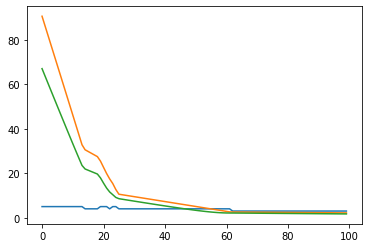

In [81]:
from sklearn.linear_model import Lasso
L0norm = []
L1norm = []
L2norm = []
errorsTest = []
for i in range(1, 101):
    poly = PolynomialFeatures(5)
    fi = poly.fit_transform(Xtrain)
    clf = Lasso(alpha=i)
    clf.fit(fi, Ytrain)
    pred = clf.predict(fi)
    L0norm.append(nonzeroes(clf.coef_))
    L1norm.append(np.linalg.norm(clf.coef_, 1))
    L2norm.append(np.linalg.norm(clf.coef_))
    fi = poly.fit_transform(Xtest)
    pred = clf.predict(fi)
plot(L0norm)
plot(L1norm)
plot(L2norm)

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [82]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

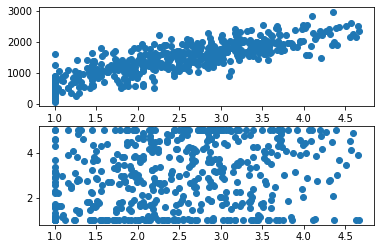

In [83]:
f, xy = plt.subplots(2)
xy[0].scatter(grades_y, exam_score)
xy[1].scatter(grades_y,  grade_in_highschool)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [86]:
poly = PolynomialFeatures(1)
fi = poly.fit_transform(grades_X)
clf = Ridge(alpha=0.01)
clf.fit(fi, grades_y)
pred = clf.predict(fi)
print(clf.coef_)
print(clf.intercept_)

[0.         0.00141497 0.09477276]
0.15061179575776196


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y2 = grades_y.reshape(-1, 1)
grades_y_fixed = scaler.fit_transform(grades_y2)
poly = PolynomialFeatures(1)
fi = poly.fit_transform(grades_X_fixed)
clf = Ridge(alpha=0.01)
clf.fit(fi, grades_y_fixed)
pred = clf.predict(fi)
print(clf.coef_)
print(clf.intercept_)

[[0.         0.81630375 0.15167761]]
[8.07023426e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [88]:
grades_to_add = np.array([[i[1]] for i in grades_X_fixed])
grades_X_fixed_colinear = np.hstack([grades_X_fixed, grades_to_add])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [89]:
poly = PolynomialFeatures(1)
fi = poly.fit_transform(grades_X_fixed_colinear)
clf = Ridge(alpha=0.01)
clf.fit(fi, grades_y_fixed)
pred = clf.predict(fi)
print(clf.coef_)
print(clf.intercept_)

[[0.         0.81630364 0.07583957 0.07583957]]
[8.07031579e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [90]:
devs1 = []
devs2 = []
devs3 = []
devs4 = []
devs5 = []
devs6 = []
for i in range(10):
    X1, X2 , Y1, Y2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5)
    poly = PolynomialFeatures(1)
    fi = poly.fit_transform(X1)
    clf = Ridge(alpha=0.01)
    clf.fit(fi, Y1)
    pred = clf.predict(fi)
    devs1.append(clf.coef_[0][1])
    devs2.append(clf.coef_[0][2])
    devs3.append(clf.coef_[0][3])
    print(clf.coef_)
    fi = poly.fit_transform(X2)
    clf = Ridge(alpha=1000)
    clf.fit(fi, Y2)
    pred = clf.predict(fi)
    devs4.append(clf.coef_[0][1])
    devs5.append(clf.coef_[0][2])
    devs6.append(clf.coef_[0][3])
    print(clf.coef_)
print(np.std(devs1))
print(np.std(devs2))
print(np.std(devs3))
print(np.std(devs4))
print(np.std(devs5))
print(np.std(devs6))

[[0.         0.79385128 0.06504303 0.06504303]]
[[0.         0.16419725 0.02816756 0.02816756]]
[[0.         0.80739011 0.0761075  0.0761075 ]]
[[0.         0.16837778 0.04200572 0.04200572]]
[[0.         0.814158   0.07673386 0.07673386]]
[[0.         0.16675609 0.03992155 0.03992155]]
[[0.         0.83265053 0.07483515 0.07483515]]
[[0.         0.16232085 0.03253696 0.03253696]]
[[0.         0.79735626 0.08013669 0.08013669]]
[[0.         0.17099764 0.03987356 0.03987356]]
[[0.         0.81845427 0.04525193 0.04525193]]
[[0.         0.15003014 0.03454006 0.03454006]]
[[0.         0.80086373 0.0614553  0.0614553 ]]
[[0.         0.17269709 0.04318487 0.04318487]]
[[0.         0.81216485 0.06648337 0.06648337]]
[[0.        0.1670921 0.0357689 0.0357689]]
[[0.         0.81501911 0.04444567 0.04444567]]
[[0.         0.16044761 0.05071806 0.05071806]]
[[0.         0.81925961 0.07443972 0.07443972]]
[[0.         0.16131422 0.03525785 0.03525785]]
0.011026717248037025
0.01216944947528435
0.0

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.